In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import datetime as dt
import seaborn as sns
from fredapi import Fred


plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 22})

plt.style.use('seaborn-poster')

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
color_standard = '#004358'

fred = Fred(api_key='4b19a2b41249fc6cf365442092cd44d6')

# 1. Subplot--Vertical



In [7]:
jolts_open = fred.get_series('JTSJOL')

In [8]:
jolts_hire = fred.get_series('JTSHIL')

''

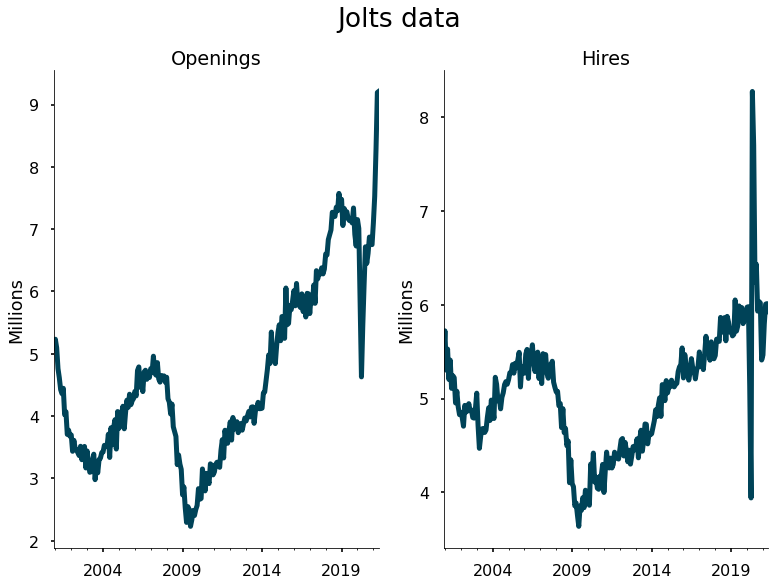

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Jolts data')
jolts_open.apply(lambda x: x/1000).plot(ax = ax1, color = '#004358', linewidth=5)
ax1.set_title('Openings')
ax1.set_ylabel('Millions')

jolts_hire.apply(lambda x: x/1000).plot(ax = ax2, color = '#004358', linewidth=5)
ax2.set_title('Hires')
ax2.set_ylabel('Millions')
plt.savefig('Figures/Fig_1.png', bbox_inches='tight', format='png')
;


# 2. Subplot--horizontal

In [14]:
url = 'https://www.atlantafed.org/-/media/documents/datafiles/chcs/wage-growth-tracker/wage-growth-data.xlsx'
wage = pd.read_excel(url, 
                     sheet_name='Average Wage Quartile', 
                     header=2, 
                     index_col=0,
                     usecols=[0,1,2,3,4]
                    )

wage = wage.replace('.','NaN')
wage.head(2)

,1st,2nd,3rd,4th
1997-01-01,NaN,NaN,NaN,NaN
1997-02-01,NaN,NaN,NaN,NaN


In [15]:
url = 'https://www.atlantafed.org/-/media/documents/datafiles/chcs/wage-growth-tracker/wage-growth-data.xlsx'
wage_indus = pd.read_excel(url, 
                     sheet_name='Industry', 
                     header=2, 
                     index_col=0,
                     usecols=[0,1,2,3,4,5,6,7,8]
                    )

wage_indus = wage_indus.replace('.','NaN')
wage_indus.columns = [x.replace('and', '&').replace('services','') for x in wage_indus.columns]
wage_indus.head(2)

,Construction & mining,Education & health,Finance & business,Leisure & hospitality,Manufacturing,Public administration,Trade & transportation,Overall
1997-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


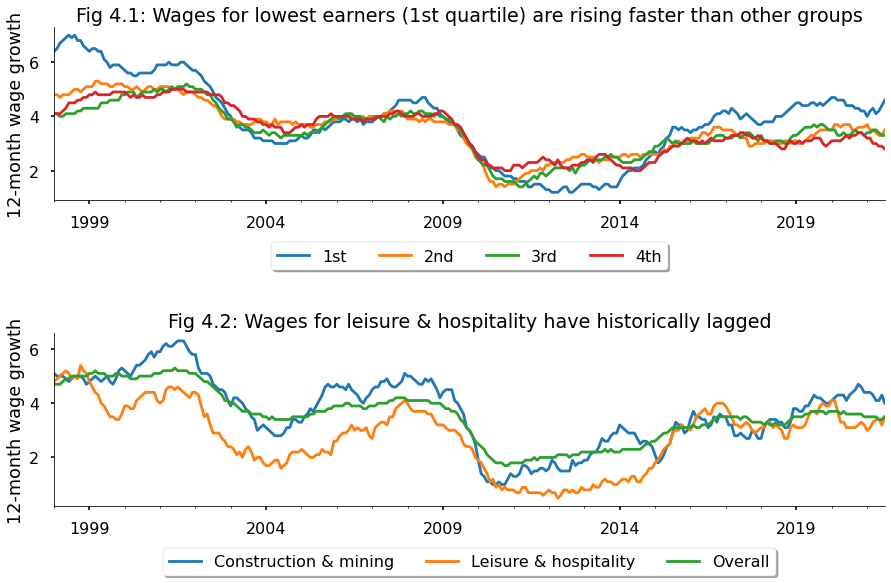

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1)
wage_indus['1998':].iloc[:, [0,3,-1]].plot(ax=ax2)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.45), ncol=3, shadow=True, fancybox=True)
#plt.xlabel('')
ax2.set_ylabel(r'12-month wage growth')
ax2.set_title('Fig 4.2: Wages for leisure & hospitality have historically lagged')

wage['1998':].plot(ax=ax1)
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.45), ncol=4, shadow=True, fancybox=True)
ax1.set_xlabel('')
ax1.set_ylabel(r'12-month wage growth')
ax1.set_title('Fig 4.1: Wages for lowest earners (1st quartile) are rising faster than other groups')

fig.tight_layout(pad=1)